# MATSim analysis

### Getting main trips out of synthetic population MATSim results

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

Load data

In [ ]:
df = pd.read_csv(r"2040baselineoutputs.csv") #using look3, ignoring some fields such as carCO2

C:\Users\maria\AppData\Local\Temp\ipykernel_38732\2736777709.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"2040baselineoutputs.csv")


In [9]:
df = df[~df["subpopulation"].isin(["hgv","lgv","airport", "lgv_ev"])]

### initial analysis overview

In [19]:
negatives = len(df[df["selected plan utility"]<0])
print(negatives)

22911


In [24]:
negatives/len(df)

0.05098028744417669

In [25]:
def neg_utility_somewhere(row):
    if row["unselected plan (1) utility"] < 0:
        return 1
    elif row["unselected plan (2) utility"] < 0:
        return 1
    elif row["unselected plan (3) utility"] < 0:
        return 1
    elif row["unselected plan (4) utility"] < 0:
        return 1
    elif row["selected plan utility"] < 0:
        return 1
    else:
        return 0

In [26]:
df["neg_utility_somewhere"] = df.apply(lambda row: neg_utility_somewhere(row), axis=1)

In [27]:
negatives_somewhere = len(df[df["neg_utility_somewhere"]==1])
print(negatives_somewhere)
print(negatives_somewhere/len(df))

28977
0.06447801445898947


Remove dummy activities "pt interaction" and the corresponding times/distances/locations

In [28]:
#get the index of where pt interaction happens
def get_ptinteraction_index(item_list):
    return [i for i, val in enumerate(item_list) if val == 'pt interaction']

In [29]:
#remove values at the index of where pt interaction is
def remove_ptinteraction(values, indices):
    # Return original list if indices is empty
    if not indices:
        return values

    # Basic type check (optional but helpful)
    if not isinstance(values, list) or not isinstance(indices, list):
        raise TypeError("Both values and indices should be lists")

    return [val for i, val in enumerate(values) if i not in indices]

In [30]:
#turn plan summaries into lists instead of long strings
df['selected plan activity_type_or_mode'] = df['selected plan activity_type_or_mode'].str.split('; ')
df['selected plan distance_travelled'] = df['selected plan distance_travelled'].str.split('; ')
df['selected plan duration'] = df['selected plan duration'].str.split('; ')
df['selected plan location'] = df['selected plan location'].str.split('; ')

df['unselected plan (1) activity_type_or_mode'] = df['unselected plan (1) activity_type_or_mode'].str.split('; ')
df['unselected plan (1) distance_travelled'] = df['unselected plan (1) distance_travelled'].str.split('; ')
df['unselected plan (1) duration'] = df['unselected plan (1) duration'].str.split('; ')
df['unselected plan (1) location'] = df['unselected plan (1) location'].str.split('; ')

df['unselected plan (2) activity_type_or_mode'] = df['unselected plan (2) activity_type_or_mode'].str.split('; ')
df['unselected plan (2) distance_travelled'] = df['unselected plan (2) distance_travelled'].str.split('; ')
df['unselected plan (2) duration'] = df['unselected plan (2) duration'].str.split('; ')
df['unselected plan (2) location'] = df['unselected plan (2) location'].str.split('; ')

df['unselected plan (3) activity_type_or_mode'] = df['unselected plan (3) activity_type_or_mode'].str.split('; ')
df['unselected plan (3) distance_travelled'] = df['unselected plan (3) distance_travelled'].str.split('; ')
df['unselected plan (3) duration'] = df['unselected plan (3) duration'].str.split('; ')
df['unselected plan (3) location'] = df['unselected plan (3) location'].str.split('; ')

df['unselected plan (4) activity_type_or_mode'] = df['unselected plan (4) activity_type_or_mode'].str.split('; ')
df['unselected plan (4) distance_travelled'] = df['unselected plan (4) distance_travelled'].str.split('; ')
df['unselected plan (4) duration'] = df['unselected plan (4) duration'].str.split('; ')
df['unselected plan (4) location'] = df['unselected plan (4) location'].str.split('; ')

In [31]:
#extract the indices of where pt interaction happens
df['selected ptinteraction_indices'] = df['selected plan activity_type_or_mode'].apply(get_ptinteraction_index)
df['unselected (1) ptinteraction_indices'] = df['unselected plan (1) activity_type_or_mode'].apply(get_ptinteraction_index)
df['unselected (2) ptinteraction_indices'] = df['unselected plan (2) activity_type_or_mode'].apply(get_ptinteraction_index)
df['unselected (3) ptinteraction_indices'] = df['unselected plan (3) activity_type_or_mode'].apply(get_ptinteraction_index)
df['unselected (4) ptinteraction_indices'] = df['unselected plan (4) activity_type_or_mode'].apply(get_ptinteraction_index)

In [32]:
#remove the pt interaction activities
df['selected plan activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['selected plan activity_type_or_mode'], row['selected ptinteraction_indices']), axis=1)
df['unselected plan (1) activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (1) activity_type_or_mode'], row['unselected (1) ptinteraction_indices']), axis=1)
df['unselected plan (2) activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (2) activity_type_or_mode'], row['unselected (2) ptinteraction_indices']), axis=1)
df['unselected plan (3) activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (3) activity_type_or_mode'], row['unselected (3) ptinteraction_indices']), axis=1)
df['unselected plan (4) activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (4) activity_type_or_mode'], row['unselected (4) ptinteraction_indices']), axis=1)

In [33]:
#remove corresponding distances
df['selected plan distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['selected plan distance_travelled'], row['selected ptinteraction_indices']), axis=1)
df['unselected plan (1) distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (1) distance_travelled'], row['unselected (1) ptinteraction_indices']), axis=1)
df['unselected plan (2) distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (2) distance_travelled'], row['unselected (2) ptinteraction_indices']), axis=1)
df['unselected plan (3) distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (3) distance_travelled'], row['unselected (3) ptinteraction_indices']), axis=1)
df['unselected plan (4) distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (4) distance_travelled'], row['unselected (4) ptinteraction_indices']), axis=1)

In [34]:
#remove corresponding durations
df['selected plan duration'] = df.apply(lambda row: remove_ptinteraction(row['selected plan duration'], row['selected ptinteraction_indices']), axis=1)
df['unselected plan (1) duration'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (1) duration'], row['unselected (1) ptinteraction_indices']), axis=1)
df['unselected plan (2) duration'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (2) duration'], row['unselected (2) ptinteraction_indices']), axis=1)
df['unselected plan (3) duration'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (3) duration'], row['unselected (3) ptinteraction_indices']), axis=1)
df['unselected plan (4) duration'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (4) duration'], row['unselected (4) ptinteraction_indices']), axis=1)

In [35]:
#remove corresponding locations
df['selected plan location'] = df.apply(lambda row: remove_ptinteraction(row['selected plan location'], row['selected ptinteraction_indices']), axis=1)
df['unselected plan (1) location'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (1) location'], row['unselected (1) ptinteraction_indices']), axis=1)
df['unselected plan (2) location'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (2) location'], row['unselected (2) ptinteraction_indices']), axis=1)
df['unselected plan (3) location'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (3) location'], row['unselected (3) ptinteraction_indices']), axis=1)
df['unselected plan (4) location'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (4) location'], row['unselected (4) ptinteraction_indices']), axis=1)

In [36]:
df = df.drop('selected ptinteraction_indices', axis=1)
df = df.drop('unselected (1) ptinteraction_indices', axis=1)
df = df.drop('unselected (2) ptinteraction_indices', axis=1)
df = df.drop('unselected (3) ptinteraction_indices', axis=1)
df = df.drop('unselected (4) ptinteraction_indices', axis=1)

temp: finding shortest activity plan to calculate manually

In [38]:
df["len"] = df["selected plan activity_type_or_mode"].apply(lambda x: len(x))

In [50]:
# df.loc[df["len"].idxmin(), "id"]
df.loc[df["len"] == df["len"].min(), "id"]

198       100174
202       100178
205       100180
949       100850
950       100851
           ...  
488249      9983
488260      9984
488271      9985
488282      9986
488293      9987
Name: id, Length: 18973, dtype: int64

In [52]:
df["wraparound"] = df["selected plan activity_type_or_mode"].apply(lambda x: 1 if x[0]==x[-1] else 0)

In [54]:
df["eod_time"] = df["selected plan duration"].apply(lambda x: x[-1])

(array([107354.,  82670.,  76675.,  69286.,  54777.,  31478.,  14721.,
          7578.,   3371.,   1499.]),
 array([   0. ,  935.7, 1871.4, 2807.1, 3742.8, 4678.5, 5614.2, 6549.9,
        7485.6, 8421.3, 9357. ]),
 <BarContainer object of 10 artists>)

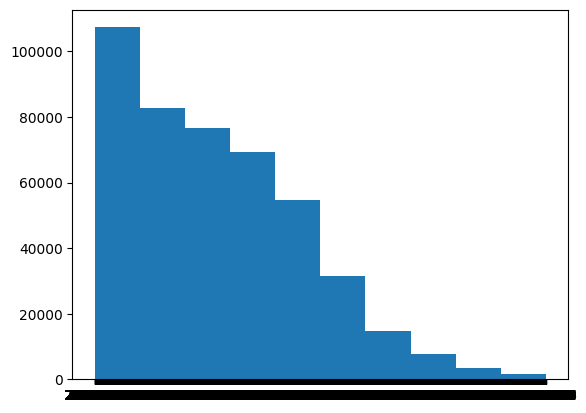

In [57]:
plt.hist(df["eod_time"], bins=10)

In [56]:
print(max(df["eod_time"]))
print(min(df["eod_time"]))

26:00:27
21:55:05


In [58]:
#activities versus modes
all_activities = {'business', 'delivery', 'depot', 'education', 'escort_business', 'escort_education', 'escort_home', 'escort_other', 'escort_shop', 'escort_work', 'home', 'medical', 'other', 'pt interaction', 'shop', 'visit', 'work'}
all_modes = {'bike', 'bus', 'car', 'car_passenger', 'ferry', 'rail', 'subway', 'taxi', 'tram', 'walk'}

In [91]:
def get_trips_indices_only(trips_and_activities):
    indices = []
    for i in range(len(trips_and_activities)):
        if trips_and_activities[i] in all_modes:
            indices.append(i)
    return indices

In [92]:
def get_activities_indices_only(trips_and_activities):
    indices = []
    for i in range(len(trips_and_activities)):
        if trips_and_activities[i] in all_activities:
            indices.append(i)
    return indices

In [93]:
def get_trips_duration_or_mode(indices, durations_or_activities):
    outputs = []
    for i in indices:
        outputs.append(durations_or_activities[i])
    return outputs

just do selected plan for now for POC

In [94]:
df["trips_indices"] = df["selected plan activity_type_or_mode"].apply(get_trips_indices_only)
df["activities_indices"] = df["selected plan activity_type_or_mode"].apply(get_activities_indices_only)
df["trip_durations"] = df.apply(lambda row: get_trips_duration_or_mode(row["trips_indices"], row["selected plan duration"]), axis=1)
df["activity_durations"] = df.apply(lambda row: get_trips_duration_or_mode(row["activities_indices"], row["selected plan duration"]), axis=1)

In [95]:
df["longest_leg"] = df["trip_durations"].apply(lambda x: max(x))

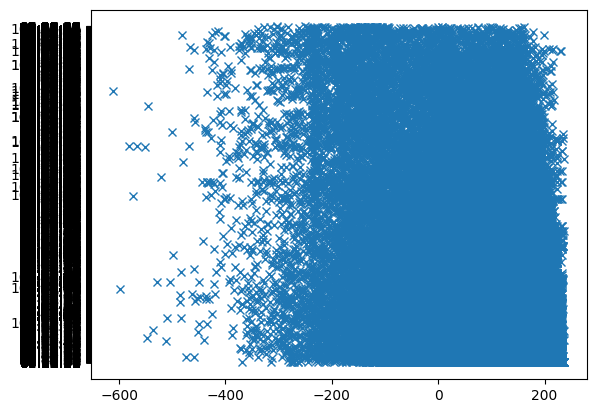

In [97]:
plt.plot(df["selected plan utility"], df["longest_leg"],"x")

In [106]:
df3 = df[pd.to_timedelta(df["longest_leg"]).dt.total_seconds() > 24 * 3600]
df4 = df[pd.to_timedelta(df["longest_leg"]).dt.total_seconds() > 12 * 3600]

In [113]:
df["abs_utlity"] = df["selected plan utility"].apply(lambda x: abs(x))

In [116]:
highest_10 = df.nlargest(round(len(df)*0.05), "selected plan utility")
lowest10 = df.nsmallest(round(len(df)*0.05), "selected plan utility")
lowest_pos10 = df.nsmallest(round(len(df)*0.05), "abs_utlity")

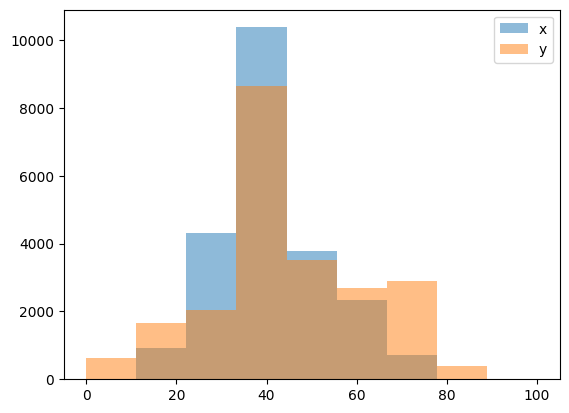

In [121]:
import numpy
from matplotlib import pyplot
bins = numpy.linspace(0, 100, 10)

pyplot.hist(highest_10["age"], bins, alpha=0.5, label='x')
pyplot.hist(lowest10["age"], bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [122]:
df_pos = df[df["neg_utility_somewhere"]==0]

Now to select the trip leg that has the longest distance between each activity

In [130]:
# keep only the indices in the activity/leg list which correspond to activities and the longest leg of each trip
# activities can be identified by having N/A distance 
# the longest leg is the longest non-NA distance between each N/A
def filter_max_between_nas_indices_only(lst):
    if not isinstance(lst, list):
        # print(lst)
        # print("error1")
        return []
        
        # raise TypeError(f"Expected a list, got {type(lst)}")

    kept_indices = []    # Indices of values to keep
    buffer = []          # Temporarily holds float values between "N/A"s
    buffer_indices = []  # Their original indices

    for i, val in enumerate(lst):
        if isinstance(val, list):
            raise TypeError(f"Unexpected nested list at index {i}: {val}")

        if val == "N/A":
            # If there is a buffer of float values, keep the max one
            if buffer:
                max_val = max(buffer)
                max_index = buffer_indices[buffer.index(max_val)]
                kept_indices.append(max_index)
                buffer = []
                buffer_indices = []

            # Always keep the index of "N/A"
            kept_indices.append(i)

        else:
            try:
                float_val = float(val)
                buffer.append(float_val)
                buffer_indices.append(i)
            except ValueError:
                raise ValueError(f"Non-numeric value encountered (not 'N/A'): {val}")

    # Handle remaining buffer if list does not end in "N/A"
    if buffer:
        max_val = max(buffer)
        max_index = buffer_indices[buffer.index(max_val)]
        kept_indices.append(max_index)

    return kept_indices

In [131]:
#find indices of activities/modes to keep based on greatest inter-NA distances 
df_pos['selected keep_indices'] = df_pos['selected plan distance_travelled'].apply(filter_max_between_nas_indices_only)
df_pos['unselected (1) keep_indices'] = df_pos['unselected plan (1) distance_travelled'].apply(filter_max_between_nas_indices_only)
df_pos['unselected (2) keep_indices'] = df_pos['unselected plan (2) distance_travelled'].apply(filter_max_between_nas_indices_only)
df_pos['unselected (3) keep_indices'] = df_pos['unselected plan (3) distance_travelled'].apply(filter_max_between_nas_indices_only)
df_pos['unselected (4) keep_indices'] = df_pos['unselected plan (4) distance_travelled'].apply(filter_max_between_nas_indices_only)

C:\Users\maria\AppData\Local\Temp\ipykernel_38732\2645369137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['selected keep_indices'] = df_pos['selected plan distance_travelled'].apply(filter_max_between_nas_indices_only)
C:\Users\maria\AppData\Local\Temp\ipykernel_38732\2645369137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['unselected (1) keep_indices'] = df_pos['unselected plan (1) distance_travelled'].apply(filter_max_between_nas_indices_only)
C:\Users\maria\AppData\Local\Temp\

In [132]:
#keep only the longest legs for each trip and the real activities
#filter the activities/legs list
df_pos['selected plan activity_type_or_mode'] = df_pos.apply(lambda row: [row['selected plan activity_type_or_mode'][i] for i in row['selected keep_indices']], axis=1)
df_pos['unselected plan (1) activity_type_or_mode'] = df_pos.apply(lambda row: [row['unselected plan (1) activity_type_or_mode'][i] for i in row['unselected (1) keep_indices']], axis=1)
df_pos['unselected plan (2) activity_type_or_mode'] = df_pos.apply(lambda row: [row['unselected plan (2) activity_type_or_mode'][i] for i in row['unselected (2) keep_indices']], axis=1)
df_pos['unselected plan (3) activity_type_or_mode'] = df_pos.apply(lambda row: [row['unselected plan (3) activity_type_or_mode'][i] for i in row['unselected (3) keep_indices']], axis=1)
df_pos['unselected plan (4) activity_type_or_mode'] = df_pos.apply(lambda row: [row['unselected plan (4) activity_type_or_mode'][i] for i in row['unselected (4) keep_indices']], axis=1)

C:\Users\maria\AppData\Local\Temp\ipykernel_38732\1220192076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['selected plan activity_type_or_mode'] = df_pos.apply(lambda row: [row['selected plan activity_type_or_mode'][i] for i in row['selected keep_indices']], axis=1)
C:\Users\maria\AppData\Local\Temp\ipykernel_38732\1220192076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['unselected plan (1) activity_type_or_mode'] = df_pos.apply(lambda row: [row['unselected plan (1) activity_type

In [133]:
#filter out corresponding distances
df_pos['selected plan distance_travelled'] = df_pos.apply(lambda row: [row['selected plan distance_travelled'][i] for i in row['selected keep_indices']], axis=1)
df_pos['unselected plan (1) distance_travelled'] = df_pos.apply(lambda row: [row['unselected plan (1) distance_travelled'][i] for i in row['unselected (1) keep_indices']], axis=1)
df_pos['unselected plan (2) distance_travelled'] = df_pos.apply(lambda row: [row['unselected plan (2) distance_travelled'][i] for i in row['unselected (2) keep_indices']], axis=1)
df_pos['unselected plan (3) distance_travelled'] = df_pos.apply(lambda row: [row['unselected plan (3) distance_travelled'][i] for i in row['unselected (3) keep_indices']], axis=1)
df_pos['unselected plan (4) distance_travelled'] = df_pos.apply(lambda row: [row['unselected plan (4) distance_travelled'][i] for i in row['unselected (4) keep_indices']], axis=1)

C:\Users\maria\AppData\Local\Temp\ipykernel_38732\3020660591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['selected plan distance_travelled'] = df_pos.apply(lambda row: [row['selected plan distance_travelled'][i] for i in row['selected keep_indices']], axis=1)
C:\Users\maria\AppData\Local\Temp\ipykernel_38732\3020660591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['unselected plan (1) distance_travelled'] = df_pos.apply(lambda row: [row['unselected plan (1) distance_travelled'][i

In [134]:
#filter out corresponding durations
df_pos['selected plan duration'] = df_pos.apply(lambda row: [row['selected plan duration'][i] for i in row['selected keep_indices']], axis=1)
df_pos['unselected plan (1) duration'] = df_pos.apply(lambda row: [row['unselected plan (1) duration'][i] for i in row['unselected (1) keep_indices']], axis=1)
df_pos['unselected plan (2) duration'] = df_pos.apply(lambda row: [row['unselected plan (2) duration'][i] for i in row['unselected (2) keep_indices']], axis=1)
df_pos['unselected plan (3) duration'] = df_pos.apply(lambda row: [row['unselected plan (3) duration'][i] for i in row['unselected (3) keep_indices']], axis=1)
df_pos['unselected plan (4) duration'] = df_pos.apply(lambda row: [row['unselected plan (4) duration'][i] for i in row['unselected (4) keep_indices']], axis=1)

C:\Users\maria\AppData\Local\Temp\ipykernel_38732\3062999413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['selected plan duration'] = df_pos.apply(lambda row: [row['selected plan duration'][i] for i in row['selected keep_indices']], axis=1)
C:\Users\maria\AppData\Local\Temp\ipykernel_38732\3062999413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['unselected plan (1) duration'] = df_pos.apply(lambda row: [row['unselected plan (1) duration'][i] for i in row['unselected (1) keep_indi

In [135]:
#filter out corresponding locations
df_pos['selected plan location'] = df_pos.apply(lambda row: [row['selected plan location'][i] for i in row['selected keep_indices']], axis=1)
df_pos['unselected plan (1) location'] = df_pos.apply(lambda row: [row['unselected plan (1) location'][i] for i in row['unselected (1) keep_indices']], axis=1)
df_pos['unselected plan (2) location'] = df_pos.apply(lambda row: [row['unselected plan (2) location'][i] for i in row['unselected (2) keep_indices']], axis=1)
df_pos['unselected plan (3) location'] = df_pos.apply(lambda row: [row['unselected plan (3) location'][i] for i in row['unselected (3) keep_indices']], axis=1)
df_pos['unselected plan (4) location'] = df_pos.apply(lambda row: [row['unselected plan (4) location'][i] for i in row['unselected (4) keep_indices']], axis=1)

C:\Users\maria\AppData\Local\Temp\ipykernel_38732\3658760790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['selected plan location'] = df_pos.apply(lambda row: [row['selected plan location'][i] for i in row['selected keep_indices']], axis=1)
C:\Users\maria\AppData\Local\Temp\ipykernel_38732\3658760790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['unselected plan (1) location'] = df_pos.apply(lambda row: [row['unselected plan (1) location'][i] for i in row['unselected (1) keep_indi

In [136]:
df_pos = df_pos.drop('selected keep_indices', axis=1)
df_pos = df_pos.drop('unselected (1) keep_indices', axis=1)
df_pos = df_pos.drop('unselected (2) keep_indices', axis=1)
df_pos = df_pos.drop('unselected (3) keep_indices', axis=1)
df_pos = df_pos.drop('unselected (4) keep_indices', axis=1)

In [143]:
#make a list with all the top 5 utilities
df_pos['plan_utilities'] = df_pos[['selected plan utility', 'unselected plan (1) utility', 'unselected plan (2) utility', 'unselected plan (3) utility', 'unselected plan (4) utility']].apply(lambda row: list(row), axis=1)

get the variation in mode choice

In [138]:
#activities versus modes
all_activities = {'business', 'delivery', 'depot', 'education', 'escort_business', 'escort_education', 'escort_home', 'escort_other', 'escort_shop', 'escort_work', 'home', 'medical', 'other', 'pt interaction', 'shop', 'visit', 'work'}
all_modes = {'bike', 'bus', 'car', 'car_passenger', 'ferry', 'rail', 'subway', 'taxi', 'tram', 'walk'}

In [139]:
def get_unique_modes(lst):
    if not isinstance(lst, list):
        return []
    lst_modes_unique = set()
    for i in lst:
        if i in all_modes:
            lst_modes_unique.add(i)
    return lst_modes_unique

In [140]:
df_pos['selected plan unique_modes'] = df_pos['selected plan activity_type_or_mode'].apply(get_unique_modes)
df_pos['selected plan no_unique_modes'] = df_pos['selected plan unique_modes'].apply(lambda x: len(x))

df_pos['unselected plan (1) unique_modes'] = df_pos['unselected plan (1) activity_type_or_mode'].apply(get_unique_modes)
df_pos['unselected plan (1) no_unique_modes'] = df_pos['unselected plan (1) unique_modes'].apply(lambda x: len(x))

df_pos['unselected plan (2) unique_modes'] = df_pos['unselected plan (2) activity_type_or_mode'].apply(get_unique_modes)
df_pos['unselected plan (2) no_unique_modes'] = df_pos['unselected plan (2) unique_modes'].apply(lambda x: len(x))

df_pos['unselected plan (3) unique_modes'] = df_pos['unselected plan (3) activity_type_or_mode'].apply(get_unique_modes)
df_pos['unselected plan (3) no_unique_modes'] = df_pos['unselected plan (3) unique_modes'].apply(lambda x: len(x))

df_pos['unselected plan (4) unique_modes'] = df_pos['unselected plan (4) activity_type_or_mode'].apply(get_unique_modes)
df_pos['unselected plan (4) no_unique_modes'] = df_pos['unselected plan (4) unique_modes'].apply(lambda x: len(x))

In [141]:
df_pos['plan_no_modes'] = df_pos[['selected plan no_unique_modes', 'unselected plan (1) no_unique_modes', 'unselected plan (2) no_unique_modes', 'unselected plan (3) no_unique_modes', 'unselected plan (4) no_unique_modes']].apply(lambda row: list(row), axis=1)
df_pos['plan_modes'] = df_pos[['selected plan unique_modes', 'unselected plan (1) unique_modes', 'unselected plan (2) unique_modes', 'unselected plan (3) unique_modes', 'unselected plan (4) unique_modes']].apply(lambda row: list(row), axis=1)

In [144]:
df_pos['utility_modes'] = df_pos.apply(lambda row: dict(zip(row['plan_utilities'], row['plan_modes'])), axis=1)
df_pos['utility_no_modes'] = df_pos.apply(lambda row: dict(zip(row['plan_utilities'], row['plan_no_modes'])), axis=1)

In [145]:
car_modes = {"car", "car_passenger"}
def get_car_only(modes):
    mode_set = set.union(*modes)
    if mode_set.issubset(car_modes):
        return 1
    else:
        return 0

In [146]:
df_pos['car_dependent'] = df_pos['plan_modes'].apply(lambda x: get_car_only(x))

In [147]:
len(df_pos[df_pos['car_dependent']==1])/len(df_pos)

0.5728750428131065

## trying to calculate a flexibility metric

In [148]:
def get_delta_u_ij(utility_modes):
    delta_u_ij = []
    utility_modes = dict(sorted(utility_modes.items(), key=lambda item: item[0], reverse=True))  #is this sorting ok?
    #print(utility_modes)
    for i in range(len(utility_modes)-1):
        if list(utility_modes.keys())[i] and list(utility_modes.keys())[i+1] == 0:
            temp_u = 0
        else:
            temp_u = abs(list(utility_modes.keys())[i]-list(utility_modes.keys())[i+1])/max(abs(list(utility_modes.keys())[i]), abs(list(utility_modes.keys())[i+1]))
        delta_u_ij.append(temp_u + 1)
    return delta_u_ij

In [149]:
#this function definitely needs more work to make it a more refined comparison between modes 
def get_delta_m_ij(utility_modes):
    delta_m_ij = []
    unique_m = []
    utility_modes = dict(sorted(utility_modes.items(), key=lambda item: item[0], reverse=True))  #is this sorting ok?
    append_unique = lambda lst, val: (lst.append(val) or lst) if val not in lst else lst
    for i in range(len(utility_modes)-1):
        if ((list(utility_modes.values())[i] != list(utility_modes.values())[i+1]) and (list(utility_modes.values())[i+1] not in unique_m)):
            temp_m = 1 
        else:
            temp_m = 0
        delta_m_ij.append(temp_m)
        append_unique(unique_m, list(utility_modes.values())[i]) #add the modes just considered to the list to discount them in future
        append_unique(unique_m, list(utility_modes.values())[i+1])
    return delta_m_ij

In [150]:
df_pos["delta_u_ij"] = df_pos["utility_modes"].apply(get_delta_u_ij)

In [151]:
df_pos["delta_m_ij"] = df_pos["utility_modes"].apply(get_delta_m_ij)

In [152]:
def get_f_value(delta_u_ij, delta_m_ij):
    f = 0
    for i in range(len(delta_u_ij)):
        f += delta_m_ij[i]/delta_u_ij[i]  #maybe add a weighitng here too such as 1/(i+1)
    return f

In [154]:
# df["delta_u_ij"] = df["utility_modes"].apply(get_delta_u_ij)
# df["delta_m_ij"] = df["utility_modes"].apply(get_delta_m_ij)
df_pos["f"] = df_pos.apply(lambda row: get_f_value(row['delta_u_ij'], row['delta_m_ij']), axis=1)

In [155]:
len(df_pos[df_pos["f"]==0])/len(df_pos) #so only 10% of people have any mode choice flexibility in this formulation
#i think the issue lies in it being the whole day plan rather than a given trip 
#try trip-specific

0.8779707538912357

In [156]:
min(df_pos["f"])

0.0

In [ ]:
df_pos2 = df_pos[["hcounty", "f"]]
# plt.plot(df2["age"], df2["f"],"x")
df_pos2.groupby('hcounty', as_index=False).mean()

,hcounty,f
0,Barking and Dagenham,0.156375
1,Barnet,0.092449
2,Bedford,0.055795
3,Bexley,0.114710
4,Brent,0.104484
5,Bromley,0.087891
6,Cambridgeshire,0.062776
7,Camden,0.210308
8,Central Bedfordshire,0.052209
9,City of London,0.202548


In [168]:
def group_legs_into_trips(activity_mode_list, activity_indices):
    modes = []
    for i in range(len(activity_indices)):
        if i>0:
            modes_temp = activity_mode_list[activity_indices[i-1]+1:activity_indices[i]]
            modes.append(list(modes_temp))
    return modes

In [169]:
df_pos["legs_to_trips"] = df_pos.apply(lambda row: group_legs_into_trips(row["selected plan activity_type_or_mode"], row["activities_indices"]), axis=1)

In [171]:
test = df_pos["selected plan activity_type_or_mode"][1]
print(test)
test_indices = get_activities_indices_only(test)
print(test_indices)

['home', 'walk', 'home', 'rail', 'work']
[0, 2, 4]


# try using duration as proxy of trip-specific utility. for first trip of day

In [51]:
# flex = sum[mode change / duration increase] across all plans

In [ ]:
def get_modes_only_indices(activities_modes):
    indices = []
    for i in range(len(activities_modes)):
        if activities_modes[i] in all_modes:
            indices.append(i)
    return indices

In [55]:
df["selected plan first_trip_index"] = df["selected plan activity_type_or_mode"].apply(get_modes_only_indices)

In [61]:
def get_first_trip(activities_modes, indices):
    if len(indices) > 0:
        temp_index = indices[0]
        return activities_modes[temp_index]
    else:
        return np.nan

In [137]:
a = ["2", "3", "N/A"]

In [148]:
a2 = [float(x) if x != "N/A" else 0 for x in a]

In [149]:
a2

[2.0, 3.0, 0]

In [150]:
def get_longest_trip(activities_modes, distances):
    if len(distances) > 0:
        distances = [float(x) if x != "N/A" else 0 for x in distances]
        temp_max = np.nanmax(distances)
        temp_index = distances.index(temp_max)
        return activities_modes[temp_index]
    else:
        return np.nan

In [151]:
df["selected plan longest_trip"] = df.apply(lambda row: get_longest_trip(row['selected plan activity_type_or_mode'], row['selected plan distance_travelled']), axis=1) #assuming all the activity plans are the same
df["unselected plan (1) longest_trip"] = df.apply(lambda row: get_longest_trip(row['unselected plan (1) activity_type_or_mode'], row['selected plan distance_travelled']), axis=1)
df["unselected plan (2) longest_trip"] = df.apply(lambda row: get_longest_trip(row['unselected plan (2) activity_type_or_mode'], row['selected plan distance_travelled']), axis=1)
df["unselected plan (3) longest_trip"] = df.apply(lambda row: get_longest_trip(row['unselected plan (3) activity_type_or_mode'], row['selected plan distance_travelled']), axis=1)
df["unselected plan (4) longest_trip"] = df.apply(lambda row: get_longest_trip(row['unselected plan (4) activity_type_or_mode'], row['selected plan distance_travelled']), axis=1)

df['longest_trip_modes'] = df[['selected plan longest_trip', 'unselected plan (1) longest_trip', 'unselected plan (2) longest_trip', 'unselected plan (3) longest_trip', 'unselected plan (4) longest_trip']].apply(lambda row: list(row), axis=1)

In [ ]:
# df["selected plan first_trip"] = df.apply(lambda row: get_first_trip(row['selected plan activity_type_or_mode'], row['selected plan first_trip_index']), axis=1) #assuming all the activity plans are the same
# df["unselected plan (1) first_trip"] = df.apply(lambda row: get_first_trip(row['unselected plan (1) activity_type_or_mode'], row['selected plan first_trip_index']), axis=1)
# df["unselected plan (2) first_trip"] = df.apply(lambda row: get_first_trip(row['unselected plan (2) activity_type_or_mode'], row['selected plan first_trip_index']), axis=1)
# df["unselected plan (3) first_trip"] = df.apply(lambda row: get_first_trip(row['unselected plan (3) activity_type_or_mode'], row['selected plan first_trip_index']), axis=1)
# df["unselected plan (4) first_trip"] = df.apply(lambda row: get_first_trip(row['unselected plan (4) activity_type_or_mode'], row['selected plan first_trip_index']), axis=1)

# df['first_trip_modes'] = df[['selected plan first_trip', 'unselected plan (1) first_trip', 'unselected plan (2) first_trip', 'unselected plan (3) first_trip', 'unselected plan (4) first_trip']].apply(lambda row: list(row), axis=1)

In [152]:
df["selected plan longest_trip_duration"] = df.apply(lambda row: get_longest_trip(row['selected plan duration'], row['selected plan distance_travelled']), axis=1) #assuming all the activity plans are the same
df["unselected plan (1) longest_trip_duration"] = df.apply(lambda row: get_longest_trip(row['unselected plan (1) duration'], row['selected plan distance_travelled']), axis=1)
df["unselected plan (2) longest_trip_duration"] = df.apply(lambda row: get_longest_trip(row['unselected plan (2) duration'], row['selected plan distance_travelled']), axis=1)
df["unselected plan (3) longest_trip_duration"] = df.apply(lambda row: get_longest_trip(row['unselected plan (3) duration'], row['selected plan distance_travelled']), axis=1)
df["unselected plan (4) longest_trip_duration"] = df.apply(lambda row: get_longest_trip(row['unselected plan (4) duration'], row['selected plan distance_travelled']), axis=1)

df['longest_trip_durations'] = df[['selected plan longest_trip_duration', 'unselected plan (1) longest_trip_duration', 'unselected plan (2) longest_trip_duration', 'unselected plan (3) longest_trip_duration', 'unselected plan (4) longest_trip_duration']].apply(lambda row: list(row), axis=1)

In [153]:
# df["selected plan first_trip_duration"] = df.apply(lambda row: get_first_trip(row['selected plan duration'], row['selected plan first_trip_index']), axis=1)  #assuming all the activity plans are the same
# df["unselected plan (1) first_trip_duration"] = df.apply(lambda row: get_first_trip(row['unselected plan (1) duration'], row['selected plan first_trip_index']), axis=1)
# df["unselected plan (2) first_trip_duration"] = df.apply(lambda row: get_first_trip(row['unselected plan (2) duration'], row['selected plan first_trip_index']), axis=1)
# df["unselected plan (3) first_trip_duration"] = df.apply(lambda row: get_first_trip(row['unselected plan (3) duration'], row['selected plan first_trip_index']), axis=1)
# df["unselected plan (4) first_trip_duration"] = df.apply(lambda row: get_first_trip(row['unselected plan (4) duration'], row['selected plan first_trip_index']), axis=1)

# df['first_trip_durations'] = df[['selected plan first_trip_duration', 'unselected plan (1) first_trip_duration', 'unselected plan (2) first_trip_duration', 'unselected plan (3) first_trip_duration', 'unselected plan (4) first_trip_duration']].apply(lambda row: list(row), axis=1)

In [154]:
# df['utility_modes_first_trip'] = df.apply(lambda row: dict(zip(row['first_trip_durations'], row['first_trip_modes'])), axis=1)
df['utility_modes_longest_trip'] = df.apply(lambda row: dict(zip(row['longest_trip_durations'], row['longest_trip_modes'])), axis=1)

In [72]:
import datetime as datetime
pd.to_timedelta(df["selected_plan first_trip_duration"][1]).seconds-pd.to_timedelta(df["selected_plan first_trip_duration"][0]).seconds

-3523

In [163]:
def get_delta_u_ij_trip(utility_modes): #use duration for now, but swap in utility when possible
    delta_u_ij = []
    utility_modes = dict(sorted(utility_modes.items(), key=lambda item: item[0], reverse=False))  #sort ascending order
    #print(utility_modes)
    for i in range(len(utility_modes)-1):
        temp_u = abs(pd.to_timedelta(list(utility_modes.keys())[i+1]).seconds/pd.to_timedelta(list(utility_modes.keys())[0]).seconds) #do a divid so that we are getting the proportion of how much longer it was
        delta_u_ij.append(temp_u)
    return delta_u_ij

In [164]:
def get_delta_m_ij_trip(utility_modes):
    delta_m_ij = []
    unique_m = []
    utility_modes = dict(sorted(utility_modes.items(), key=lambda item: item[0], reverse=False))  #is this sorting ok?
    append_unique = lambda lst, val: (lst.append(val) or lst) if val not in lst else lst
    append_unique(unique_m, list(utility_modes.values())[0])
    for i in range(len(utility_modes)-1):
        if ((list(utility_modes.values())[0] != list(utility_modes.values())[i+1]) and (list(utility_modes.values())[i+1] not in unique_m)):
            temp_m = 1 
        else:
            temp_m = 0
        delta_m_ij.append(temp_m)
        append_unique(unique_m, list(utility_modes.values())[i+1]) #add the modes just considered to the list to discount them in future
    return delta_m_ij

In [165]:
def get_f_value_firsttrip(delta_u_ij, delta_m_ij):
    f = 0
    for i in range(len(delta_u_ij)):
        f += delta_m_ij[i]/delta_u_ij[i]  #maybe add a weighitng here too such as 1/(i+1)
    return f

In [166]:
df["delta_u_ij_trip"] = df["utility_modes_longest_trip"].apply(get_delta_u_ij_trip)
df["delta_m_ij_trip"] = df["utility_modes_longest_trip"].apply(get_delta_m_ij_trip)
df["f_first_trip"] = df.apply(lambda row: get_f_value(row['delta_u_ij_trip'], row['delta_m_ij_trip']), axis=1)

In [167]:
df=df[~df["subpopulation"].isin(["lgv", "hgv", "airport"])]

In [168]:
len(df[df["f_first_trip"]==0])/len(df)

0.9400263934302213

(array([3.49581e+05, 7.04800e+03, 2.50000e+02, 2.60000e+01, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.        , 0.58702909, 1.17405818, 1.76108727, 2.34811636,
        2.93514545, 3.52217454, 4.10920362, 4.69623271, 5.2832618 ,
        5.87029089]),
 <BarContainer object of 10 artists>)

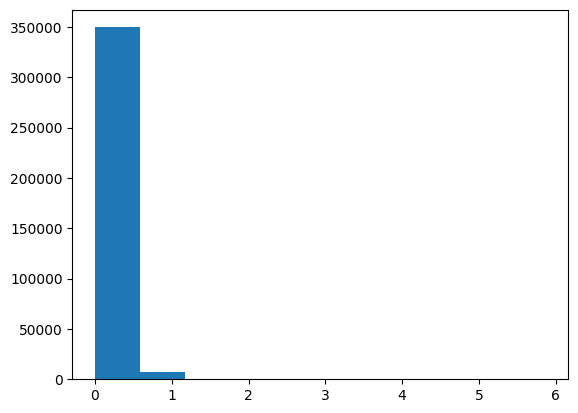

In [169]:
plt.hist(df["f_first_trip"])

In [170]:
print(max(df["f_first_trip"]))
print(min(df["f_first_trip"]))

5.870290891750119
0.0


In [171]:
df_2 = df[["subpopulation", "f_first_trip"]]
df_2.groupby('subpopulation', as_index=False).mean()

,subpopulation,f_first_trip
0,ev_high,0.022524
1,ev_low,0.018824
2,ev_medium,0.012673
3,high,0.026870
4,low,0.037642
5,medium,0.025913


## extract specific trip purposes

In [ ]:
# get the list of purposes
# find the first instance of X purpose and save the index
# get the corresponding index of mode and departure time as well as utility
# repeat for all 4 other plans

In [19]:
a = df.head(5)

In [ ]:
print([i for i, val in enumerate(a["selected plan activity_type_or_mode"][1]) if val == "visit"][0])


2


: 

In [ ]:
def get_delta_t_ij(durations):
    

In [ ]:
def get_purpose_trip(activities, modes, duration, utilities, purpose="work"):
    purp_index = [i for i, val in enumerate(activities) if val == purpose][0] #activities is "selected plan activity_type_or_mode"
    purp_index = purp_index - 1 #get the travel that happens just before work
    

get the columns named "unselected plan (4) activity_type_or_mode" and separate out modes and activities using the all_modes and all_activities lists. then add up durations to get start times. extract corresponding times/distances/locations. 

consider how to account for multiple trips in one plan - compare each corresponding leg one by one and sum for a given plan's F?

In [23]:
def get_modes_only_indices(activities_modes):
    indices = []
    for i in range(len(activities_modes)):
        if activities_modes[i] in all_modes:
            indices.append(i)
    return indices

In [24]:
def get_modes_info_only(plan_data, mode_indices):
    modes = []
    # activities = []
    for i in range(len(plan_data)):
        if i in mode_indices:
            modes.append(plan_data[i])
    return modes

In [28]:
df["modes_indices"] = df["selected plan activity_type_or_mode"].apply(get_modes_only_indices)

In [29]:
df["selected modes_list"] = df.apply(lambda row: get_modes_info_only(row['selected plan activity_type_or_mode'], row['modes_indices']),axis=1)
df["unselected 1 modes_list"] = df.apply(lambda row: get_modes_info_only(row['unselected plan (1) activity_type_or_mode'], row['modes_indices']),axis=1)
df["unselected 2 modes_list"] = df.apply(lambda row: get_modes_info_only(row['unselected plan (2) activity_type_or_mode'], row['modes_indices']),axis=1)
df["unselected 3 modes_list"] = df.apply(lambda row: get_modes_info_only(row['unselected plan (3) activity_type_or_mode'], row['modes_indices']),axis=1)
df["unselected 4 modes_list"] = df.apply(lambda row: get_modes_info_only(row['unselected plan (4) activity_type_or_mode'], row['modes_indices']),axis=1)

In [30]:
df['plan_all_modes'] = df[['selected modes_list', 'unselected 1 modes_list', 'unselected 2 modes_list', 'unselected 3 modes_list', 'unselected 4 modes_list']].apply(lambda row: list(row), axis=1)
df['plan_utilities'] = df[['selected plan utility', 'unselected plan (1) utility', 'unselected plan (2) utility', 'unselected plan (3) utility', 'unselected plan (4) utility']].apply(lambda row: list(row), axis=1)
df['utility_modes'] = df.apply(lambda row: dict(zip(row['plan_utilities'], row['plan_all_modes'])), axis=1)

Comparing whole plan as one thing

In [31]:
df["delta_u_ij"] = df["utility_modes"].apply(get_delta_u_ij)
df["delta_m_ij"] = df["utility_modes"].apply(get_delta_m_ij)
df["f"] = df.apply(lambda row: get_f_value(row['delta_u_ij'], row['delta_m_ij']), axis=1)

In [32]:
len(df[df["f"]!=0])/len(df) 

0.10517741466415136

comparing plan legs  

In [34]:
len(a["utility_modes"][0])

5

In [ ]:
#this function definitely needs more work to make it a more refined comparison between modes 
def get_delta_m_ij_legs(utility_modes):
    leg_delta_m_ij = []
    unique_m = []
    utility_modes = dict(sorted(utility_modes.items(), key=lambda item: item[0], reverse=True))  #is this sorting ok?
    append_unique = lambda lst, val: (lst.append(val) or lst) if val not in lst else lst
    for i in range(len(utility_modes[0])): #for each leg (number of legs constant)
        




        if ((list(utility_modes.values())[i] != list(utility_modes.values())[i+1]) and (list(utility_modes.values())[i+1] not in unique_m)):
            temp_m = 1 
        else:
            temp_m = 0
        delta_m_ij.append(temp_m)
        append_unique(unique_m, list(utility_modes.values())[i]) #add the modes just considered to the list to discount them in future
        append_unique(unique_m, list(utility_modes.values())[i+1])
    return delta_m_ij